<a href="https://colab.research.google.com/github/Mostafa-Mohamed-Atef/movies-data-science/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [352]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
data = pd.read_csv('/content/cleaned_movies .csv')
data

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; over,notalk,notalk,0,13000000,25682380,42195766,2013fail,13000000,25682380,42195766,1,1
1,2012,tt1343727,dredd 3d,ok-disagree,ok,1,45000000,13414714,40868994,2012pass,45658735,13611086,41467257,1,1
2,2013,tt2024544,12 years a slave,notalk-disagree,notalk,0,20000000,53107035,158607035,2013fail,20000000,53107035,158607035,1,1
3,2013,tt1272878,2 guns,notalk,notalk,0,61000000,75612460,132493015,2013fail,61000000,75612460,132493015,1,1
4,2013,tt0453562,42,men,men,0,40000000,95020213,95020213,2013fail,40000000,95020213,95020213,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,1971,tt0067741,shaft,notalk,notalk,0,53012938,70327868,107190108,1971fail,305063707,404702718,616827003,9,5
1752,1971,tt0067800,straw dogs,notalk,notalk,0,25000000,10324441,11253821,1971fail,143862856,59412143,64760273,9,5
1753,1971,tt0067116,the french connection,notalk,notalk,0,2200000,41158757,41158757,1971fail,12659931,236848653,236848653,9,5
1754,1971,tt0067992,willy wonka &amp; the chocolate factory,men-disagree,men,0,3000000,4000000,4000000,1971fail,17263543,23018057,23018057,9,5


In [354]:
data.columns

Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'period code', 'decade code'],
      dtype='object')

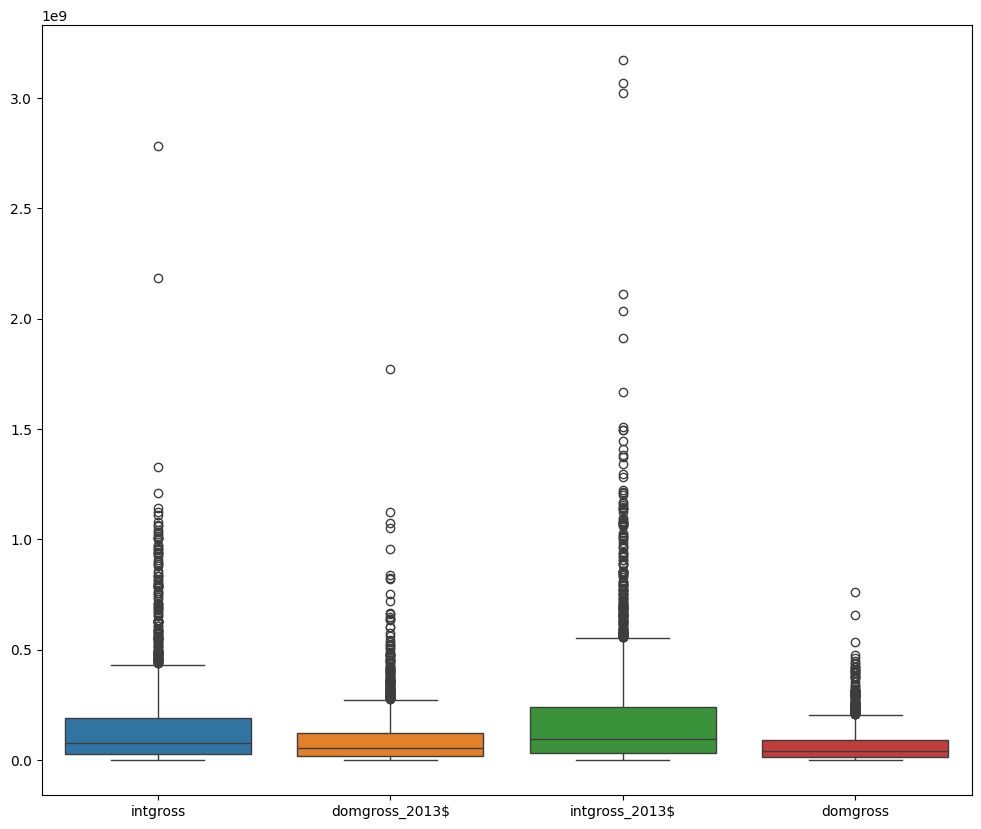

In [355]:
plt.figure(figsize=[12,10])
sns.boxplot(data[['intgross','domgross_2013$',
       'intgross_2013$','domgross']])
plt.show()

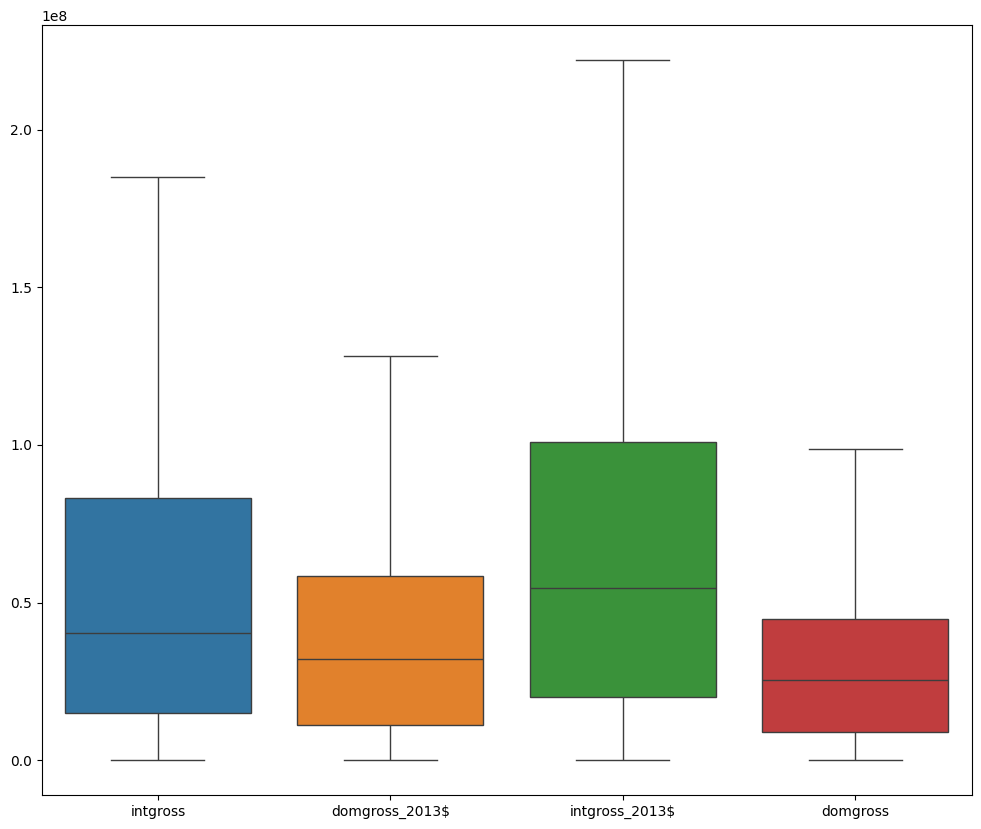

In [398]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    data_no_outliers = data[(data[column] >= (Q1 - 1.5 * IQR)) & (data[column] <= (Q3 + 1.5 * IQR))]
    return data_no_outliers

# Iteratively remove outliers from all columns
columns = ['intgross', 'domgross_2013$', 'intgross_2013$', 'domgross']
for column in columns:
    data = remove_outliers_iqr(data, column)

plt.figure(figsize=(12, 10))
sns.boxplot(data[columns])
plt.show()

<Axes: >

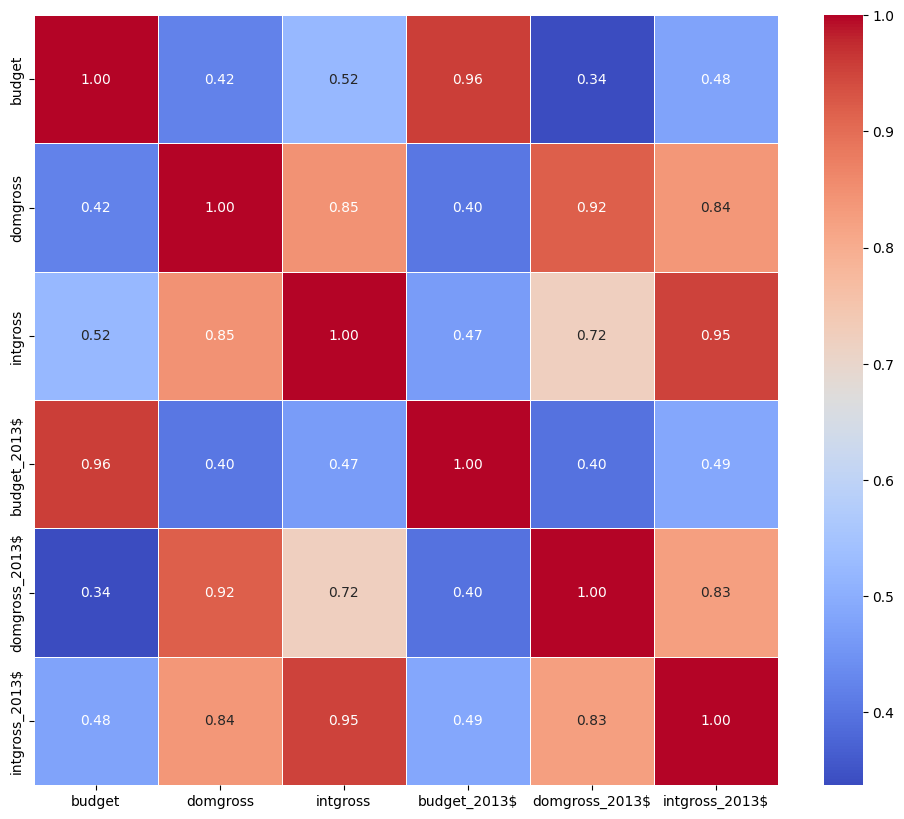

In [399]:
numerical_columns = [
'budget',
       'domgross', 'intgross','budget_2013$', 'domgross_2013$',
       'intgross_2013$'
]

correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

##Linear Regression

In [400]:
x = data[['intgross','domgross_2013$',
       'intgross_2013$']]
y = data['domgross'].values

In [401]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=44,shuffle = True)

print('x_train : ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

x_train :  (903, 3)
x_test:  (302, 3)
y_train :  (903,)
y_test :  (302,)


In [402]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)


linear_regression_model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)
linear_regression_model.fit(x_train_normalized, y_train)


LinearRegression(n_jobs=-1)

In [403]:
print(linear_regression_model.score(x_train_normalized,y_train))
print(linear_regression_model.score(x_test_normalized,y_test))

0.9763889056154758
0.9676831231782812


In [404]:
y_pred = linear_regression_model.predict(x_test_normalized)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error ,r2_score

mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 2252294.6547471755
mean squared error is 17419987612588.629
median absolute error is 1187547.6312718894
the r2 score 0.9676831231782812


##Decision Tree Regression

In [405]:
from sklearn.tree import DecisionTreeRegressor

DTM = DecisionTreeRegressor(max_depth=10,random_state=33)
DTM.fit(x_train_normalized,y_train)

print(DTM.score(x_train_normalized,y_train))
print(DTM.score(x_test_normalized,y_test))

0.9976776900029415
0.9552740127376466


In [406]:
y_pred = DTM.predict(x_test_normalized)

mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 2912070.4757306166
mean squared error is 24108955465256.367
median absolute error is 1149231.5
the r2 score 0.9552740127376466


##KNN Regression

In [407]:
from sklearn.neighbors import KNeighborsRegressor

CLF = KNeighborsRegressor(11)
CLF.fit(x_train_normalized,y_train)


KNeighborsRegressor(n_neighbors=11)

In [408]:
print(CLF.score(x_train_normalized,y_train))
print(CLF.score(x_test_normalized,y_test))

0.9756361505752391
0.9708158753388572


In [409]:
y_pred = CLF.predict(x_test_normalized)

In [410]:
mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 2541989.2459361823
mean squared error is 15731318743638.139
median absolute error is 1673516.4090909073
the r2 score 0.9708158753388572


In [413]:
data

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code,passed,failed
0,2013,tt1711425,21 &amp; over,notalk,notalk,0,13000000,25682380,42195766,13000000,25682380,42195766,1,1,1,0
1,2012,tt1343727,dredd 3d,ok-disagree,ok,1,45000000,13414714,40868994,45658735,13611086,41467257,1,1,0,1
2,2013,tt2024544,12 years a slave,notalk-disagree,notalk,0,20000000,53107035,158607035,20000000,53107035,158607035,1,1,1,0
3,2013,tt1272878,2 guns,notalk,notalk,0,61000000,75612460,132493015,61000000,75612460,132493015,1,1,1,0
4,2013,tt0453562,42,men,men,0,40000000,95020213,95020213,40000000,95020213,95020213,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,1972,tt0069089,pink flamingos,ok,ok,1,12000,413802,413802,66866,2305762,2305762,9,5,1,0
1750,1971,tt0067065,escape from the planet of the apes,notalk,notalk,0,2500000,12300000,12300000,14386286,70780525,70780525,9,5,1,0
1752,1971,tt0067800,straw dogs,notalk,notalk,0,25000000,10324441,11253821,143862856,59412143,64760273,9,5,0,1
1754,1971,tt0067992,willy wonka &amp; the chocolate factory,men-disagree,men,0,3000000,4000000,4000000,17263543,23018057,23018057,9,5,1,0


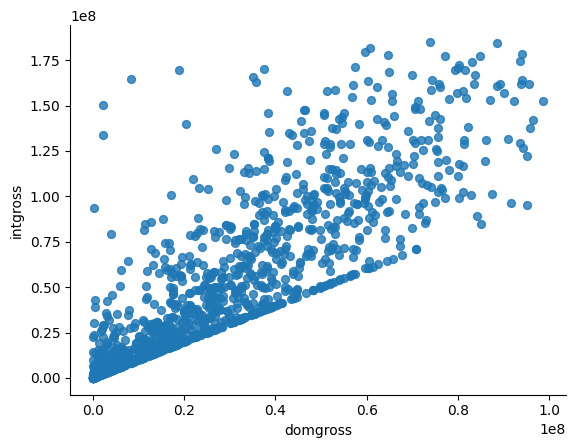

In [414]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='domgross', y='intgross', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [415]:
input_data = data[['budget','intgross']]


In [416]:
input_data

,budget,intgross
0,13000000,42195766
1,45000000,40868994
2,20000000,158607035
3,61000000,132493015
4,40000000,95020213
...,...,...
1748,12000,413802
1750,2500000,12300000
1752,25000000,11253821
1754,3000000,4000000


#Classification

In [417]:
data.columns

Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'period code', 'decade code', 'passed', 'failed'],
      dtype='object')

In [418]:
data[['intgross','budget','passed','failed']].corr()

,intgross,budget,passed,failed
intgross,1.000000,0.522035,0.412204,-0.411066
budget,0.522035,1.000000,-0.181773,0.182806
passed,0.412204,-0.181773,1.000000,-0.997889
failed,-0.411066,0.182806,-0.997889,1.000000


In [419]:
import numpy as np
target_variable = 'passed'
features = ['intgross','budget']
x = data[features]
y = data[target_variable]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=44, shuffle=True)

##Naive Bayes

In [420]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7983425414364641
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.22      0.35        93
           1       0.79      1.00      0.88       269

    accuracy                           0.80       362
   macro avg       0.89      0.61      0.62       362
weighted avg       0.84      0.80      0.75       362



##Decision Tree

In [432]:
from sklearn import tree

In [433]:
model = tree.DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=9,random_state=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=9, random_state=10)

In [434]:
model.feature_importances_

array([0.53623323, 0.46376677])

In [435]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9916963226571768
0.9558011049723757


In [436]:
y_pred = model.predict(x_test)


In [437]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9558011049723757
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        93
           1       0.97      0.97      0.97       269

    accuracy                           0.96       362
   macro avg       0.94      0.95      0.94       362
weighted avg       0.96      0.96      0.96       362



<Axes: xlabel='domgross', ylabel='intgross'>

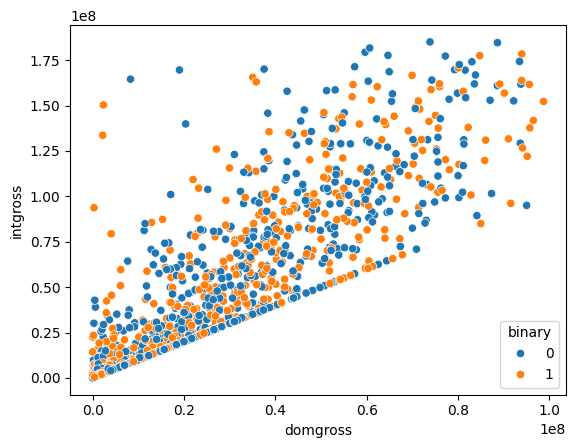

In [438]:
sns.scatterplot(x=data['domgross'],y=data['intgross'], hue=data['binary'])

##KNN classification

In [442]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [443]:
y_pred = knn.predict(x_test)

In [444]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9806629834254144
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        93
           1       0.99      0.99      0.99       269

    accuracy                           0.98       362
   macro avg       0.98      0.97      0.97       362
weighted avg       0.98      0.98      0.98       362

